# Capstone Project - Health Care

## OverView of the Project

- Cardiovascular diseases (CVDs) are the leading cause of death globally.
-An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.
-Over three quarters of CVD deaths take place in low- and middle-income countries.
-Out of the 17 million premature deaths (under the age of 70) due to noncommunicable diseases in 2019, 38% were caused by CVDs.
-Most cardiovascular diseases can be prevented by addressing behavioral risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol.
-It is important to detect cardiovascular disease as early as possible so that management with counselling and medicines can begin.

## Aim is to predict survival of patients with Heart failure

**Attribute Information :**

Clinical Features :

- age : Age of the patient(Years)
- anaemia : Decrese of red blood cells or hemoglobin (Boolean)
- creatinine phosphokinase (CPK) : Level of the CPK enzyme in the blood (mcg/L)
- diabetes : If the patient has diabetes (Boolean)
- ejection fraction : Percentage of blood leaving the heart at each contraction (Percentage)
- high blood pressure : if the patient has hypertension (Boolean)
- platelets : Platelets in the blood (Kiloplatelets/ml)
- serum creatinine :Level of serum cretinine in the blood (mg/dL)
- serum sodium - Level of serum sodium in the blood (mEg/L)
- sex : Woman or Man (Binary)
- smoking : If the person is smoking or not (Boolean)
- time : Follow-Up period(Days)
- death event : If the patient deceased during the follow-up period (Boolean)




In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# size of the dataset
df.shape

(299, 13)

#### Exploratory Data Analysis

In [4]:
#finding the datatype of our column
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [5]:
# find the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
# describe the dataset to know statistical information
df.describe().round(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


In [7]:
# column names
df.columns.to_list()

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

<AxesSubplot:>

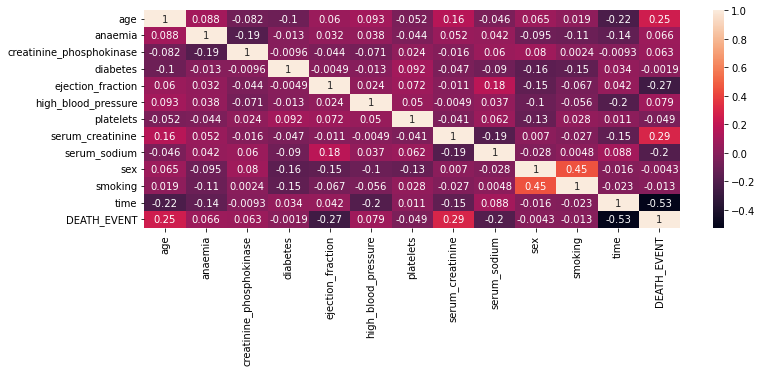

In [8]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

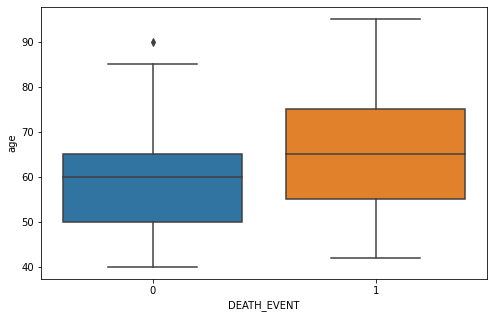

In [9]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df['DEATH_EVENT'], y = df['age'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

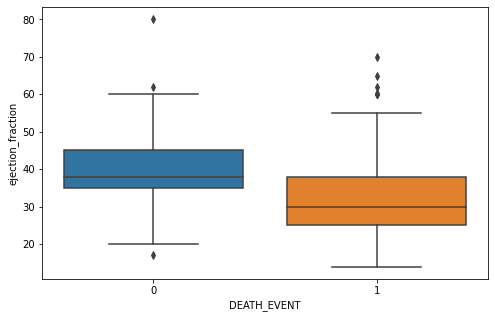

In [10]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df['DEATH_EVENT'], y = df['ejection_fraction'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='time'>

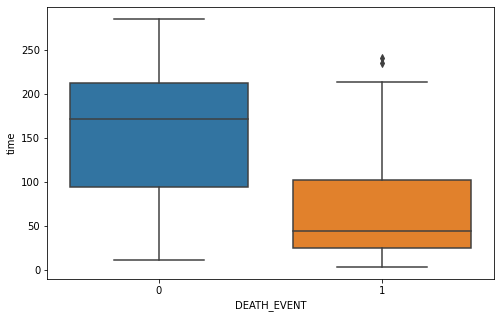

In [11]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df['DEATH_EVENT'], y = df['time'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

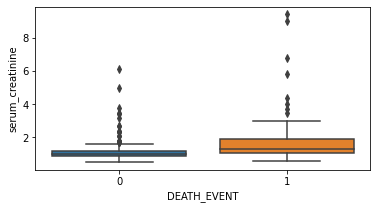

In [12]:
plt.figure(figsize = (6,3))
sns.boxplot(x = df['DEATH_EVENT'], y = df['serum_creatinine'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

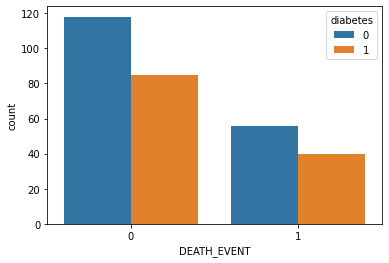

In [13]:
sns.countplot(df['DEATH_EVENT'], hue= df['diabetes'])

#### Our Target value here is DEATH_EVENT. So rename it to 'target'

In [14]:
# using rename function note we must the inplace = True to change it from our orginal dataset
df.rename(columns = {'DEATH_EVENT' : 'target'}, inplace = True)

In [15]:
# first 5 row of target variable
df.target[:5]

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

#### Let check if the dataset have any missing values

In [16]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
target                      0
dtype: int64

In [17]:
# how many elements in target variable
df.target.nunique()

2

Target variable having only two elements because it is a binary value. The patient is deceased or not.

Text(0.5, 1.0, 'Target')

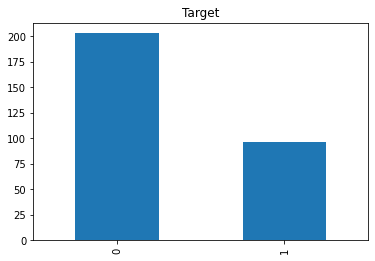

In [18]:
# visualise the target variable
df.target.value_counts().plot(kind ='bar')
plt.title("Target")

##### From above we can see that the death is more than the number of survived

In [19]:
# Find the mean,max.min of the age columns
print('The minimum age is :', df.age.min())
print('-----------------------------------')
print('The average age is :', df.age.mean())
print('-----------------------------------')
print('The maximum age is :', df.age.max())

The minimum age is : 40.0
-----------------------------------
The average age is : 60.83389297658862
-----------------------------------
The maximum age is : 95.0


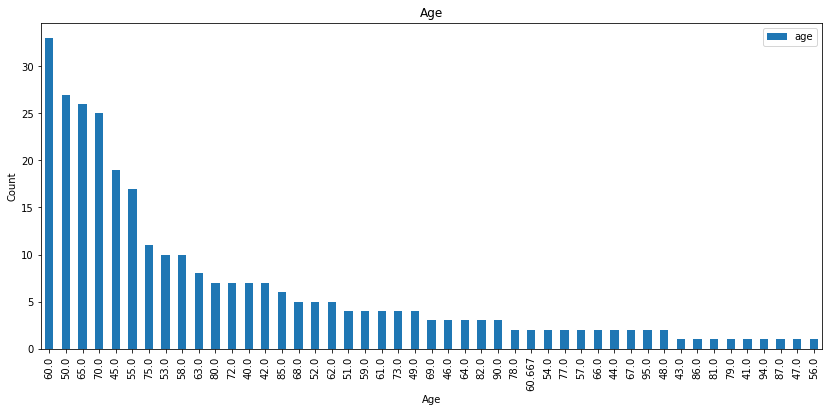

In [20]:
# Age distribution
df.age.value_counts().plot(kind = 'bar', figsize =(14,6))
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age')

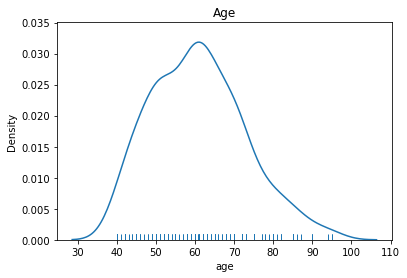

In [21]:
# Distribution plot of age
sns.distplot(df['age'], bins = 30, rug = True, hist = False)
plt.title("Age")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


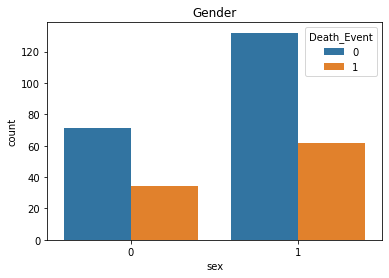

In [45]:
sns.countplot(df['sex'],hue = 'target', data = df)
plt.title('Gender')
plt.legend(title = "Death_Event")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


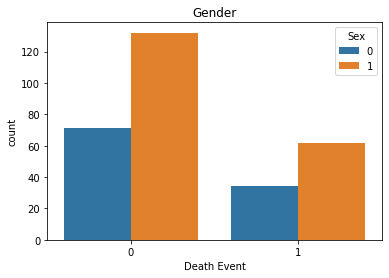

In [47]:
sns.countplot(df['target'],hue = 'sex', data = df)
plt.title('Gender')
plt.xlabel('Death Event')
plt.legend(title = "Sex")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


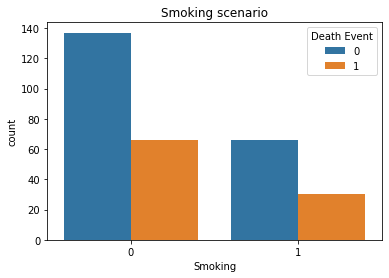

In [48]:
sns.countplot(df['smoking'],hue = 'target', data = df)
plt.title('Smoking scenario')
plt.xlabel('Smoking')
plt.legend(title = "Death Event")
plt.show()

It shows that the number of male that didn't survived is very high as compare to female.

Text(0.5, 1.0, 'smoking or Not')

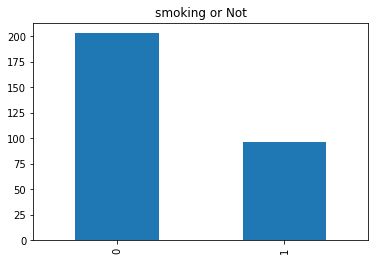

In [23]:
df.smoking.value_counts().plot(kind = 'bar')
plt.title('smoking or Not')

We see here that the number of people who smoke is more than those who don't smoke.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Smoking with respect to sex')

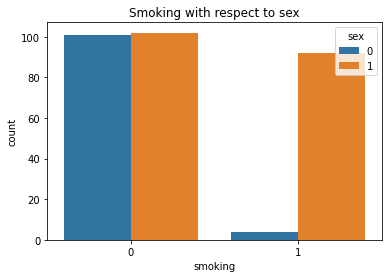

In [24]:
sns.countplot(df['smoking'], hue = 'sex', data = df)
plt.title('Smoking with respect to sex')

In [25]:
#machine learning model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

## Feature selection

In [26]:
X = df.drop('target', axis = 1)
Y = df.target

In [27]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 20, random_state =0)
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression()

In [29]:
Y_pred = logreg.predict(X_test)
Y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [30]:
accuracy = logreg.score(X_test, Y_test)
print('The accuracy of logistic regression is :', accuracy*100,'%')

The accuracy of logistic regression is : 85.0 %


In [31]:
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[13,  0],
       [ 3,  4]], dtype=int64)

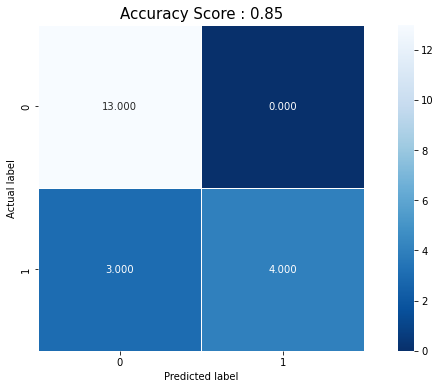

In [32]:
plt.figure(figsize = (12,6))
sns.heatmap(cm, annot=True, fmt =".3f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
sample_title = 'Accuracy Score : {0}'.format(accuracy)
plt.title(sample_title,size = 15);

**The result is telling us that we have 13 + 4 correct predictions and 0 +3 incorrect predictions.**

### Classification Report

In [33]:
cl = classification_report(Y_test,Y_pred)
print(cl)

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.57      0.73         7

    accuracy                           0.85        20
   macro avg       0.91      0.79      0.81        20
weighted avg       0.88      0.85      0.84        20



The precision is the ratio P =tp/(tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ration R = tp/(tp + fn) where tp is the number of true positive and fn is the false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F1 score can be interpreted as a weighted harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. F1-score = 2*(R * P)R+P

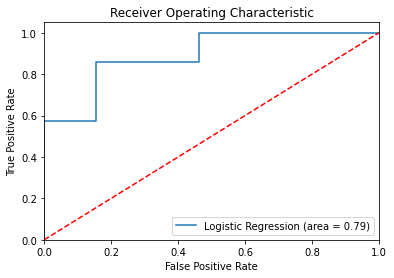

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

## Random Forest Classifier

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .25, random_state =1)
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [36]:
Y_pred = rfc.predict(X_test)
Y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

### Model Evaluation

In [37]:
accuracy_rfc = rfc.score(X_test,Y_test).round(3)
print('The accuracy of Random_Forest Classifier is {}'.format(accuracy_rfc))

The accuracy of Random_Forest Classifier is 0.907


In [49]:
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[52,  3],
       [ 4, 16]], dtype=int64)

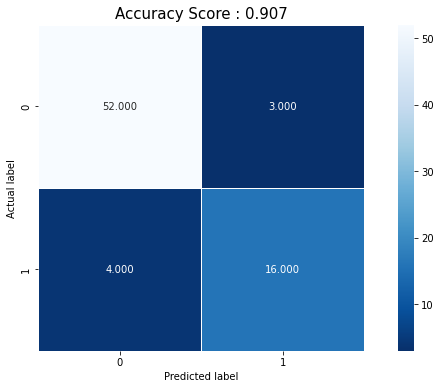

In [51]:
plt.figure(figsize = (12,6))
sns.heatmap(cm, annot=True, fmt =".3f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
sample_title = 'Accuracy Score : {0}'.format(accuracy_rfc)
plt.title(sample_title,size = 15);

In [39]:
cl = classification_report(Y_test,Y_pred)
print(cl)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        55
           1       0.84      0.80      0.82        20

    accuracy                           0.91        75
   macro avg       0.89      0.87      0.88        75
weighted avg       0.91      0.91      0.91        75



In [40]:
auc = roc_auc_score(Y_test, Y_pred)
auc

0.8727272727272728

In [41]:
fpr, tpr, thresholds = roc_curve(Y_test,Y_pred)

In [42]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color ='orange', label = 'ROC')
    plt.plot([0,1],[0,1],color = 'darkblue', linestyle = '--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend()
    plt.title("Receiver Operating Characteristic 'ROC' curve")
    plt.show()

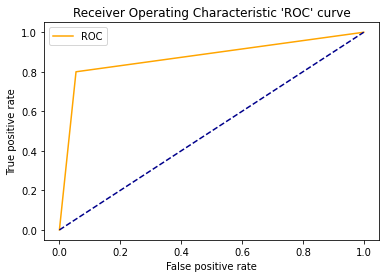

In [43]:
plot_roc_curve(fpr,tpr)

In [44]:
df_acu = pd.DataFrame({'Logisticregression' : accuracy,
                      'RandomForestClassifier' : accuracy_rfc}, index = ['a', 'b'])
df_acu

,Logisticregression,RandomForestClassifier
a,0.85,0.907
b,0.85,0.907
